<a href="https://colab.research.google.com/github/tienenkuo/Python---Predicting-House-Prices-with-Bootstrapping-Regression-Model/blob/main/Python_Predicting_House_Prices_with_Bootstrapping_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will be working with a dataset on homes in King County from 2015. The data is available here: https://www.kaggle.com/harlfoxem/housesalesprediction  

We are interested in predicting the price of a house based on various features about the home.


In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing, impute
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns


In [3]:
data = pd.read_csv('kc_house_data.csv')
print(data.head()) #print the first few rows of the dataset
data.describe()

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**1. EDA**

a) 21,436 houses are in the dataset 

b) There are 21 columns. 20 columns should be included as part of our training model ('ID' column should be excluded).

In [9]:
#a
num_house = len(data.drop_duplicates(subset = 'id'))
print('Number of houses :', num_house)
## 21,436 houses are in the dataset

#b
shape = data.shape
print('Number of columns :', shape[1])
## There are 21 columns. 20 columns should be included as part of our training 
# model ('ID' column should be excluded).


Number of houses : 21436
Number of columns : 21


**2.** 

a) Make a histogram of the house prices.

b) Using plt.scatter, plot the house prices against sq_ft living. 

No handles with labels found to put in legend.


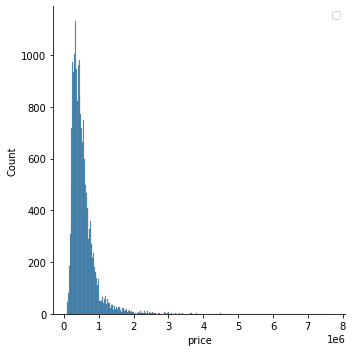

No handles with labels found to put in legend.


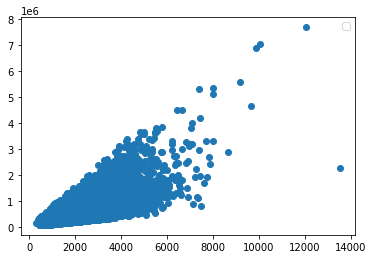

In [10]:
# a) Make a histogram of the house prices.
sns.displot(data['price'],kind='hist')
plt.legend()
plt.show()

# b) Using plt.scatter, plot the house prices against sq_ft living.
plt.scatter(data['sqft_living'],data['price'])
plt.legend()
plt.show()

**We noticed that:**

1) Generally speaking, prices increase as sq_fr living increases. 

2) The price range corresponding to a sq_ft living is pretty wide, especially for houses that are smaller than 8,000 sqft.

Now we are going to make a predictive linear model. First we will pull out the dependent variable column, ``price``, and we will also create a list of features we will use in our model. We will also pull out the predictive variables ``x``.

In [11]:
y = data['price']
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'zipcode',  'condition', 'grade', 'waterfront', 
            'view', 'sqft_above', 'sqft_basement',  'yr_built', 'yr_renovated', 
            'lat', 'long', 'sqft_living15']
x = data[features]

**3.**

a) train a linear regression model that uses ``x`` as the features, and ``y`` as the dependent variable. 

b) Compute the R2 of our model: 0.699

In [12]:
model = linear_model.LinearRegression()
# YOUR CODE HERE
model.fit(x,y)
y_model=model.predict(x)
r2_score(y,y_model) # 0.699

0.6993679820456147

**4.** ``model.coef_`` is the array of model coefficients. We are interested in building a confidence interval on ``model.coef_[2]`` which corresponds to the ``sqft_living`` feature. 

To do this we will be using the **bootstrap.** 

a) The code randomly resamples our training data 50 times. Each time we resample, retrain our model and save the coefficient of ``sqft_living``. Then plot the sampling distribution and return a 95% bootstrap confidence interval. 

b) What would have happened if we had assume normality and made a confidence interval based on the standard error? Which confidence interval we trust better?

a.Lower: 97.32526187492105  a.Upper: 123.9502619605861


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0    105.278962
1    114.167402
Name: sqft_living, dtype: float64


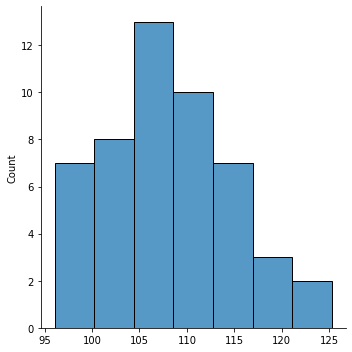

In [13]:
coeffs = []
for i in range(50):
    resample_idxs = np.random.choice(len(data), len(data))
    y_resample = y[resample_idxs]
    x_resample = x.iloc[resample_idxs]
    
    model.fit(x_resample,y_resample)
    coeffs.append(model.coef_[2])

## a)
# plot the sample distribution of the coefficient of sqft_living
sns.displot(coeffs,kind='hist')

# return a 95% bootstrap confidence interval
[lower, upper] = np.percentile(coeffs, [2.5, 97.5])

print("a.Lower:", lower, " a.Upper:", upper)
 # Lower: 97.48554326025013  , Upper: 123.36840064355417

## b)
import numpy as np, statsmodels.api as sm
mod = sm.OLS(y, x)
res = mod.fit()
print(res.conf_int(0.05).iloc[2] )
 # Lower: 105.278962  , Upper: 114.167402




###### NOT RELEVANT ####
## print(res.summary())






**We trust the bootstrap confidence level better here because:**

1) it is wider an interval than the one when we assume normality, thus a larger chance to cover the true mean.

2) we don't know whether normality is a legit assumption.

3) bootstraps resample many times, thus simulate the population better than one single distribution